## Membership constraints

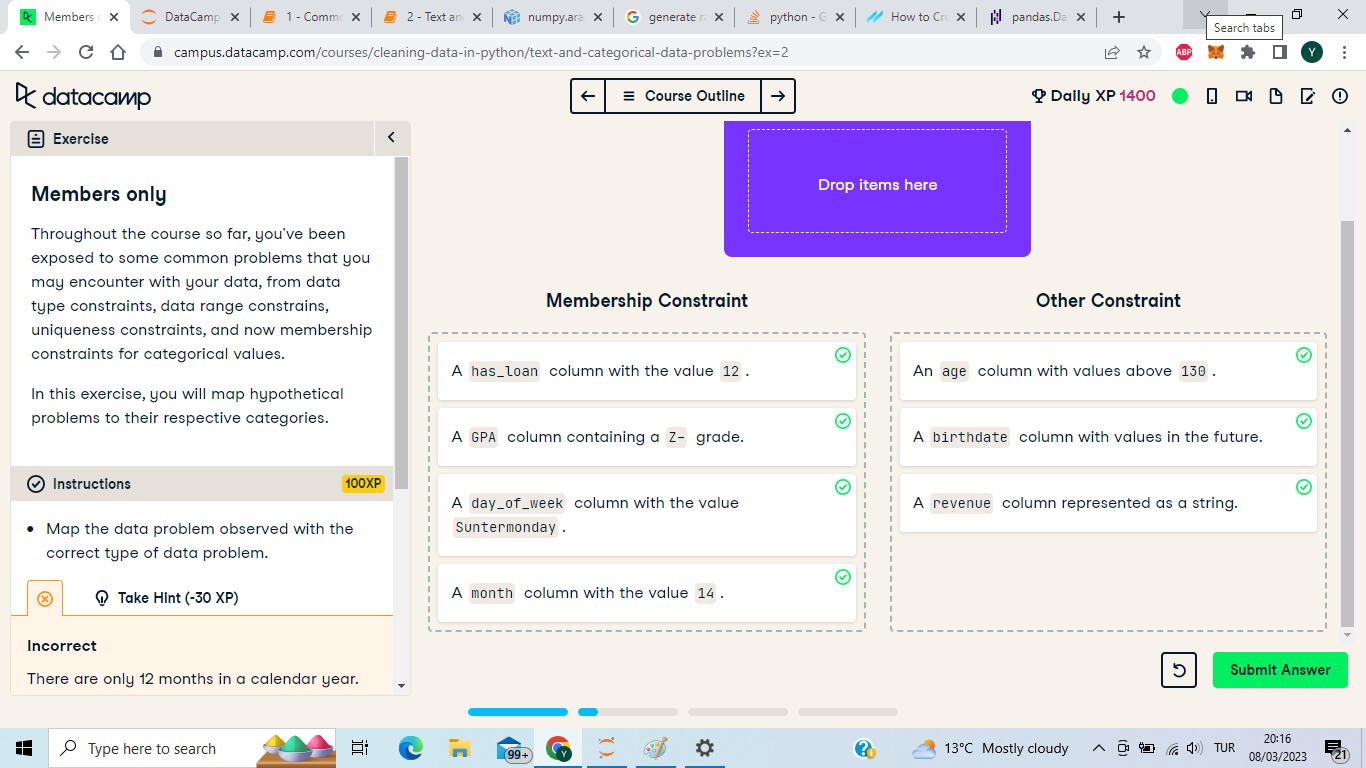

Tremendous work. You're becoming an elite member of categorical variable experts!

#### Finding consistency
In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the airlines and categories DataFrames are in your environment.

In [4]:
import pandas as pd

airlines = pd.read_csv("airlines_final.csv")
categories = {'cleanliness':["Clean","Average","Somewhat clean","Somewhat dirty","Dirty"],
              'safety' : ["Neutral","Very safe","Somewhat safe","Very unsafe","Somewhat unsafe"],
              'satisfaction' : ["Very satisfied","Neutral","Somewhat satisfied","Somewhat unsatisfied","Very unsatisfied"]}

categories = pd.DataFrame(categories)
categories.to_csv('categories.csv')

# Print categories DataFrame
print(categories,"\n")

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied 

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Unacceptable' 'Somewhat dirty'
 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



#### Question
Take a look at the output. Out of the cleanliness, safety and satisfaction columns, which one has an inconsistent category and what is it?

<strong>a.cleanliness because it has an Unacceptable category.</strong><br>
b.cleanliness because it has a Terribly dirty category.<br>
c.satisfaction because it has a Very satisfied category.<br>
d.safety because it has a Neutral category.



In [5]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines["cleanliness"]).difference(categories["cleanliness"])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

     Unnamed: 0    id       day      airline  destination    dest_region  \
5             5   634  Thursday       ALASKA       NEWARK        East US   
13           14  2589  Saturday     INTERJET  GUADALAJARA  Canada/Mexico   
239         272  2126    Monday  UNITED INTL  MEXICO CITY  Canada/Mexico   

    dest_size boarding_area   dept_time  wait_min   cleanliness  \
5         Hub   Gates 50-59  2018-12-31     140.0  Unacceptable   
13     Medium    Gates 1-12  2018-12-31     155.0  Unacceptable   
239       Hub  Gates 91-102  2018-12-31     190.0  Unacceptable   

            safety        satisfaction  
5        Very safe      Very satisfied  
13   Somewhat safe  Somewhat satsified  
239      Very safe  Somewhat satsified  


In [6]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows], "\n\n\n\n")

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

     Unnamed: 0    id       day      airline  destination    dest_region  \
5             5   634  Thursday       ALASKA       NEWARK        East US   
13           14  2589  Saturday     INTERJET  GUADALAJARA  Canada/Mexico   
239         272  2126    Monday  UNITED INTL  MEXICO CITY  Canada/Mexico   

    dest_size boarding_area   dept_time  wait_min   cleanliness  \
5         Hub   Gates 50-59  2018-12-31     140.0  Unacceptable   
13     Medium    Gates 1-12  2018-12-31     155.0  Unacceptable   
239       Hub  Gates 91-102  2018-12-31     190.0  Unacceptable   

            safety        satisfaction  
5        Very safe      Very satisfied  
13   Somewhat safe  Somewhat satsified  
239      Very safe  Somewhat satsified   




      Unnamed: 0    id        day        airline        destination  \
0              0  1351    Tuesday    UNITED INTL             KANSAI   
1              1   373     Friday         ALASKA  SAN JOSE DEL CABO   
2              2  2820   Thursday          D

Great _consistent_ work! Keep it up! In the next lesson, we'll be looking at more in depth solutions to dealing with dirty categorical data.

## Categorical variables

#### Categories of errors

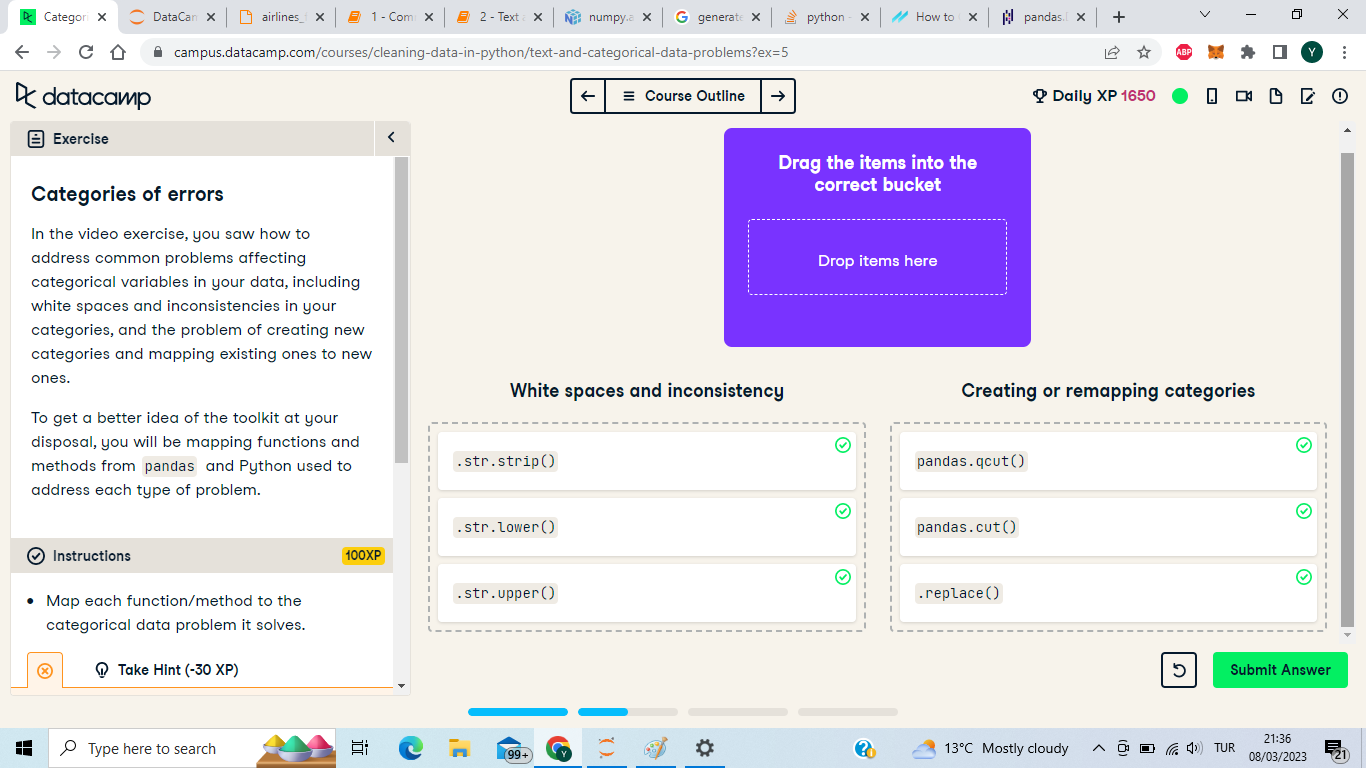

Awesome work! In the next 2 exercises, you'll work with all these functions!

#### Inconsistent categories
In this exercise, you'll be revisiting the airlines DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, dest_region and dest_size respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The pandas package has been imported as pd, and the airlines DataFrame is in your environment.

In [7]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


#### Question
From looking at the output, what do you think is the problem with these columns?


a.The dest_region column has only inconsistent values due to capitalization.<br>
b.The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped.<br>
c.The dest_size column has only inconsistent values due to leading and trailing spaces.<br>
<strong>d.Both 2 and 3 are correct.</strong>

In [8]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

In [9]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())


['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


Great work! Notice how all categories have been properly treated?

#### Remapping categories
To better understand survey respondents from airlines, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+<br>
day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.<br>
The pandas and numpy packages have been imported as pd and np. Let's create some new categorical data!

In [10]:
import numpy as np

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines["wait_min"], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday':'weekday', 'Thursday':'weekday', 'Friday':'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)
airlines

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2804,1475,Tuesday,ALASKA,NEW YORK-JFK,east us,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified,long,weekday
2473,2805,2222,Thursday,SOUTHWEST,PHOENIX,west us,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied,medium,weekday
2474,2806,2684,Friday,UNITED,ORLANDO,east us,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied,medium,weekday
2475,2807,2549,Tuesday,JETBLUE,LONG BEACH,west us,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied,medium,weekday


Awesome work! You just created two new categorical variables, that when combined with other columns, could produce really interesting analysis. Don't forget, you can always use an assert statement to check your changes passed.

## Cleaning text data
#### Removing titles and taking names
While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the full_name column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "Dr.", "Mr.", "Ms." and "Miss".

Your ultimate objective is to create two new columns named first_name and last_name, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The airlines DataFrame is in your environment, alongside pandas as pd

In [11]:
'''
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

'''
######### SINCE THERE IS NO COLUMN 'full_name', we cannot execute the code but keep the logic in mind!!!! 

'\n# Replace "Dr." with empty string ""\nairlines[\'full_name\'] = airlines[\'full_name\'].str.replace("Dr.","")\n\n# Replace "Mr." with empty string ""\nairlines[\'full_name\'] = airlines[\'full_name\'].str.replace("Mr.","")\n\n# Replace "Miss" with empty string ""\nairlines[\'full_name\'] = airlines[\'full_name\'].str.replace("Miss","")\n\n# Replace "Ms." with empty string ""\nairlines[\'full_name\'] = airlines[\'full_name\'].str.replace("Ms.","")\n\n# Assert that full_name has no honorifics\nassert airlines[\'full_name\'].str.contains(\'Ms.|Mr.|Miss|Dr.\').any() == False\n\n'

Great work! By normalizing full names this way, you can now easily split them into first names and last names!

#### Keeping it descriptive
To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the survey_response column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an assert statement.

The airlines DataFrame is in your environment, and pandas is imported as pd.

In [12]:
'''
# Store length of each row in survey_response column
resp_length = airlines["survey_response"].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey["survey_response"].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

'''
######### SINCE THERE IS NO COLUMN 'survey_response', we cannot execute the code but keep the logic in mind!!!! 

'\n# Store length of each row in survey_response column\nresp_length = airlines["survey_response"].str.len()\n\n# Find rows in airlines where resp_length > 40\nairlines_survey = airlines[resp_length > 40]\n\n# Assert minimum survey_response length is > 40\nassert airlines_survey["survey_response"].str.len().min() > 40\n\n# Print new survey_response column\nprint(airlines_survey[\'survey_response\'])\n\n'

Phenomenal work! These types of feedbacks are essential to improving any service. Coupled with some wordcount analysis, you can find common patterns across all survey responses in no time!